In [276]:
BASE_DIR = '../'*3
DATASET_DIR = BASE_DIR+'code/util/dataset/dataset_dummy.ipynb'
EXTMODEL_DIR = BASE_DIR + 'code/CNN/cnn_ext_model/ext_model.ipynb'

In [304]:
%run {DATASET_DIR}
%run {EXTMODEL_DIR}

Using device: cpu
Using PyTorch version: 1.9.0


In [305]:
imagenet = DummyDataset('imagenet', 'select',[3,224,224],1000)

1000


In [180]:
CnnExtModel.set_macro('p24',
    ['serial',
        ['loop', {'repeat':'#repeat'}, ['conv', {'ksize':3, 'chn':'#chn'}]],
        ['max', {'stride':2}]])

CnnExtModel.set_macro('vgg_19',
    ['serial',
        ['custom', {'name':'p24', 'args':{'#repeat':2, '#chn':64}}],
        ['custom', {'name':'p24', 'args':{'#repeat':2, '#chn':128}}],
        ['custom', {'name':'p24', 'args':{'#repeat':4, '#chn':256}}],
        ['custom', {'name':'p24', 'args':{'#repeat':4, '#chn':512}}],
        ['custom', {'name':'p24', 'args':{'#repeat':4, '#chn':512}}],
        ['loop', {'repeat':2}, ['full', {'width':4096}]]])

vgg19 = CnnExtModel('vgg_19', imagenet,
        ['custom', {'name':'vgg_19'}], dump_structure=True)

custom vgg_19
  serial
    custom p24
      serial
        loop
          1: conv, [3, 224, 224]=>[64, 224, 224]pm : 64x3x3x3+64 = 1792
          2: conv, [64, 224, 224]=>[64, 224, 224]pm : 64x64x3x3+64 = 36928
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
ReLU()
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
ReLU()
        3: max, [64, 224, 224]=>[64, 112, 112]
MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same), ReLU(), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same), ReLU(), MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)]
    custom p24
      serial
        loop
          4: conv, [64, 112, 112]=>[128, 112, 112]pm : 128x64x3x3+128 = 73856
          5: conv, [128, 112, 112]=>[128, 112, 112]pm : 128x128x3x3+128 = 147584
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
ReLU()
Conv2d(128, 

In [125]:
vgg19.net

[P_Block(
   (p24_1): Sequential(
     (dict): ModuleDict(
       (p24_1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
       (p24_1_2): ReLU()
       (p24_1_3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
       (p24_1_4): ReLU()
       (p24_1_5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
     )
   )
 ),
 P_Block(
   (p24_2): Sequential(
     (dict): ModuleDict(
       (p24_2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
       (p24_2_2): ReLU()
       (p24_2_3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
       (p24_2_4): ReLU()
       (p24_2_5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
     )
   )
 ),
 P_Block(
   (p24_3): Sequential(
     (dict): ModuleDict(
       (p24_3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
       (p24_3_2): ReLU()
       (p24_3_3): Conv2d(256, 256, kernel_size

In [254]:
CnnExtModel.set_macro('pn',
    ['serial',
        ['conv', {'ksize':3, 'stride':2, 'chn':'#n', 'actions':'#act'}],
        ['loop', {'repeat':'#cnt1'},
                 ['conv', {'ksize':3, 'chn':'#n', 'actions':'#act'}]]])

CnnExtModel.set_macro('plain_34',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':64, 'actions':'#act'}],
        ['max', {'stride':2}],
        ['loop', {'repeat':6}, ['conv', {'ksize':3, 'chn':64, 'actions':'#act'}]],
        ['custom', {'name':'pn', 'args':{'#cnt1':7, '#n':128, '#act':'#act'}}],
        ['custom', {'name':'pn', 'args':{'#cnt1':11, '#n':256, '#act':'#act'}}],
        ['custom', {'name':'pn', 'args':{'#cnt1':5, '#n':512, '#act':'#act'}}],
        ['avg', {'stride':7}]])

plain_34 = CnnExtModel('plain_34', imagenet,
       ['custom', {'name':'plain_34', 'args':{'#act':'LA'}}], dump_structure=True)

custom plain_34
  serial
    1: conv, [3, 224, 224]=>[64, 112, 112]pm : 64x3x7x7+64 = 9472
    2: max, [64, 112, 112]=>[64, 56, 56]
    loop
      3: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
      4: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
      5: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
      6: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
      7: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
      8: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
    custom pn
      serial
        9: conv, [64, 56, 56]=>[128, 28, 28]pm : 128x64x3x3+128 = 73856
        loop
          10: conv, [128, 28, 28]=>[128, 28, 28]pm : 128x128x3x3+128 = 147584
          11: conv, [128, 28, 28]=>[128, 28, 28]pm : 128x128x3x3+128 = 147584
          12: conv, [128, 28, 28]=>[128, 28, 28]pm : 128x128x3x3+128 = 147584
          13: conv, [128, 28, 28]=>[128, 28, 28]pm : 128x128x3x3+128 = 147584
          14: conv, [128, 28, 28]

In [167]:
plain_34.net

[rsd_net(
   (rsd1): Sequential(
     (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
     (1): ReLU()
     (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
   )
   (rsd2): Sequential(
     (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (1): ReLU()
     (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (3): ReLU()
     (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (5): ReLU()
     (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (7): ReLU()
     (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (9): ReLU()
     (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (11): ReLU()
   )
 ),
 rsd_net(
   (rsd1): Sequential(
     (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
     (1): ReLU()
   )
   (rsd2): Sequential(
     (0): Conv2d(128, 128, kernel_size=(

In [306]:
CnnExtModel.set_macro('rf',
    ['add', {'x':True},
        ['serial', ['conv', {'ksize':3, 'chn':'#n', 'actions':'#act'}],
                   ['conv', {'ksize':3, 'chn':'#n', 'actions':'#act'}]]])

CnnExtModel.set_macro('rh',
    ['add', {'x':False},
        ['serial', ['conv', {'ksize':3, 'stride':2, 'chn':'#n', 'actions':'#act'}],
                   ['conv', {'ksize':3, 'chn':'#n', 'actions':'#act'}]],
        ['avg', {'stride':2}]])

CnnExtModel.set_macro('rfull',
    ['serial',
        ['loop', {'repeat':'#cnt'},
                 ['custom', {'name':'rf', 'args':{'#n':'#n', '#act':'#act'}}]]])

CnnExtModel.set_macro('rhalf',
    ['serial',
        ['custom', {'name':'rh', 'args':{'#n':'#n', '#act':'#act'}}],
        ['loop', {'repeat':'#cnt1'},
                 ['custom', {'name':'rf', 'args':{'#n':'#n', '#act':'#act'}}]]])

CnnExtModel.set_macro('residual_34',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':64, 'actions':'#act'}],
        ['max', {'stride':2}],
        ['custom', {'name':'rfull', 'args':{'#cnt':3, '#n':64, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':3, '#n':128, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':5, '#n':256, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':2, '#n':512, '#act':'#act'}}],
        ['avg', {'stride':7}]])

residual_34 = CnnExtModel('residual_34', imagenet,
    ['custom', {'name':'residual_34', 'args':{'#act':'LA'}}], dump_structure=True)

custom residual_34
residual_34 residual_34
  serial
    1: conv, [3, 224, 224]=>[64, 112, 112]pm : 64x3x7x7+64 = 9472
    2: max, [64, 112, 112]=>[64, 56, 56]
    custom rfull
residual_34 rfull
      serial
        loop
          custom rf
residual_34 rf
            add
              serial
                3: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
                4: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
          custom rf
residual_34 rf
            add
              serial
                5: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
                6: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
          custom rf
residual_34 rf
            add
              serial
                7: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
                8: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
    custom rhalf
residual_34 rhalf
      serial
        custom rh
residual_34 rh
          add
       

In [301]:
residual_34.net

[normal(
   (layer): Sequential(
     (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
     (1): ReLU()
     (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
   )
 ),
 P_Block(
   (rf_1): Sequential(
     (dict): ModuleDict(
       (rf_1_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
       (rf_1_2): ReLU()
       (rf_1_3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
       (rf_1_4): ReLU()
     )
   )
 ),
 P_Block(
   (rf_2): Sequential(
     (dict): ModuleDict(
       (rf_2_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
       (rf_2_2): ReLU()
       (rf_2_3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
       (rf_2_4): ReLU()
     )
   )
 ),
 P_Block(
   (rf_3): Sequential(
     (dict): ModuleDict(
       (rf_3_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
       (rf_3_2): ReLU()
       (rf_3_3): Conv2d(64, 64, kernel_s

In [35]:
%run {DATASET_DIR}
%run {EXTMODEL_DIR}

Using device: cpu
Using PyTorch version: 1.9.0


In [256]:
CnnExtModel.set_macro('bf',
    ['add', {'x':True},
        ['serial',
            ['conv', {'ksize':1, 'chn':'#n1', 'actions':'#act'}],
            ['conv', {'ksize':3, 'chn':'#n1', 'actions':'#act'}],
            ['conv', {'ksize':1, 'chn':'#n4', 'actions':'#act'}]]])

CnnExtModel.set_macro('bh',
    ['add', {'x':False},
        ['serial',
            ['conv', {'ksize':1, 'stride':2, 'chn':'#n1', 'actions':'#act'}],
            ['conv', {'ksize':3, 'chn':'#n1', 'actions':'#act'}],
            ['conv', {'ksize':1, 'chn':'#n4', 'actions':'#act'}]],
        ['avg', {'stride':2}]])

CnnExtModel.set_macro('bfull',
    ['serial',
        ['loop', {'repeat':'#cnt'},
            ['custom', {'name':'bf', 'args':{'#n1':'#n1', '#n4':'#n4',
                '#act':'#act'}}]]])

CnnExtModel.set_macro('bhalf',
    ['serial',
        ['custom', {'name':'bh', 'args':{'#n1':'#n1', '#n4':'#n4',
                '#act':'#act'}}],
        ['loop', {'repeat':'#cnt1'},
            ['custom', {'name':'bf', 'args':{'#n1':'#n1', '#n4':'#n4',
                '#act':'#act'}}]]])

CnnExtModel.set_macro('bottleneck_152',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':64, 'actions':'#act'}],
        ['max', {'ksize':3, 'stride':2}],
        ['custom', {'name':'bfull','args':{'#cnt':3,'#n1':64,'#n4':256,'#act':'#act'}}],
        ['custom', {'name':'bhalf','args':{'#cnt1':7,'#n1':128,'#n4':512,
            '#act':'#act'}}],
        ['custom', {'name':'bhalf','args':{'#cnt1':35,'#n1':256,'#n4':1024,
            '#act':'#act'}}],
        ['custom', {'name':'bhalf','args':{'#cnt1':2,'#n1':512,'#n4':2048,
            '#act':'#act'}}],
        ['avg', {'stride':7}]])

bottleneck_152 = CnnExtModel('bottleneck_152', imagenet,
        ['custom', {'name':'bottleneck_152', 'args':{'#act':'LAB'}}],
                    dump_structure=True)

custom bottleneck_152
  serial
    1: conv, [3, 224, 224]=>[64, 112, 112]pm : 64x3x7x7+64 = 9472
    2: max, [64, 112, 112]=>[64, 56, 56]
    custom bfull
      serial
        loop
          custom bf
            add
              serial
                3: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x1x1+64 = 4160
                4: conv, [64, 56, 56]=>[64, 56, 56]pm : 64x64x3x3+64 = 36928
                5: conv, [64, 56, 56]=>[256, 56, 56]pm : 256x64x1x1+256 = 16640
[Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), padding=same), ReLU(), BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same), ReLU(), BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True), Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), padding=same), ReLU(), BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)]
          custom bf
            add
              serial
    

        custom bh
          add
            serial
              37: conv, [512, 28, 28]=>[256, 14, 14]pm : 256x512x1x1+256 = 131328
              38: conv, [256, 14, 14]=>[256, 14, 14]pm : 256x256x3x3+256 = 590080
              39: conv, [256, 14, 14]=>[1024, 14, 14]pm : 1024x256x1x1+1024 = 263168
            40: avg, [512, 28, 28]=>[512, 14, 14]
[Conv2d(512, 256, kernel_size=(1, 1), stride=(2, 2)), ReLU(), BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same), ReLU(), BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True), Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), padding=same), ReLU(), BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True), AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))]
        loop
          custom bf
            add
              serial
                41: conv, [1024, 14, 14]=>[256, 14, 14]

                72: conv, [256, 14, 14]=>[256, 14, 14]pm : 256x256x3x3+256 = 590080
                73: conv, [256, 14, 14]=>[1024, 14, 14]pm : 1024x256x1x1+1024 = 263168
[Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), padding=same), ReLU(), BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same), ReLU(), BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True), Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), padding=same), ReLU(), BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)]
          custom bf
            add
              serial
                74: conv, [1024, 14, 14]=>[256, 14, 14]pm : 256x1024x1x1+256 = 262400
                75: conv, [256, 14, 14]=>[256, 14, 14]pm : 256x256x3x3+256 = 590080
                76: conv, [256, 14, 14]=>[1024, 14, 14]pm : 1024x256x1x1+1024 = 263168
[Conv2d(1024, 256, kernel_size=(1, 1)

                105: conv, [256, 14, 14]=>[256, 14, 14]pm : 256x256x3x3+256 = 590080
                106: conv, [256, 14, 14]=>[1024, 14, 14]pm : 1024x256x1x1+1024 = 263168
[Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), padding=same), ReLU(), BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same), ReLU(), BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True), Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), padding=same), ReLU(), BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)]
          custom bf
            add
              serial
                107: conv, [1024, 14, 14]=>[256, 14, 14]pm : 256x1024x1x1+256 = 262400
                108: conv, [256, 14, 14]=>[256, 14, 14]pm : 256x256x3x3+256 = 590080
                109: conv, [256, 14, 14]=>[1024, 14, 14]pm : 1024x256x1x1+1024 = 263168
[Conv2d(1024, 256, kernel_size=(

                138: conv, [256, 14, 14]=>[256, 14, 14]pm : 256x256x3x3+256 = 590080
                139: conv, [256, 14, 14]=>[1024, 14, 14]pm : 1024x256x1x1+1024 = 263168
[Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), padding=same), ReLU(), BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same), ReLU(), BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True), Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), padding=same), ReLU(), BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)]
          custom bf
            add
              serial
                140: conv, [1024, 14, 14]=>[256, 14, 14]pm : 256x1024x1x1+256 = 262400
                141: conv, [256, 14, 14]=>[256, 14, 14]pm : 256x256x3x3+256 = 590080
                142: conv, [256, 14, 14]=>[1024, 14, 14]pm : 1024x256x1x1+1024 = 263168
[Conv2d(1024, 256, kernel_size=(

In [37]:
bottleneck_152.net

[P_Block(
   (bf_1): Sequential(
     (dict): ModuleDict(
       (bf_1_1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
       (bf_1_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
       (bf_1_3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
       (bf_1_4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
       (bf_1_5): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), padding=same)
       (bf_1_6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
     )
   )
 ),
 P_Block(
   (bf_2): Sequential(
     (dict): ModuleDict(
       (bf_2_1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
       (bf_2_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
       (bf_2_3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
       (bf_2_4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Fal

In [3]:
# F_DATA_DIR = BASE_DIR+ 'code/util/dataset/flower_prepro.ipynb'

# %run {F_DATA_DIR}

# fd = FlowersDataset([64,64], [3,64,64])

Using device: cpu
Using PyTorch version: 1.9.0


In [302]:
EPOCH = 1
BATCH_SIZE=20
NUM_WORKERS=0
LEARNING_RATE = 0.0003

custom plain_flower
  serial
    1: conv, (3, 64, 64)=>[16, 32, 32]pm : 16x3x7x7+16 = 2368
    2: max, [16, 32, 32]=>[16, 16, 16]
    loop
      3: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
      4: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
      5: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
      6: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
    custom pn
      serial
        7: conv, [16, 16, 16]=>[32, 8, 8]pm : 32x16x3x3+32 = 4640
        loop
          8: conv, [32, 8, 8]=>[32, 8, 8]pm : 32x32x3x3+32 = 9248
          9: conv, [32, 8, 8]=>[32, 8, 8]pm : 32x32x3x3+32 = 9248
          10: conv, [32, 8, 8]=>[32, 8, 8]pm : 32x32x3x3+32 = 9248
[]
aaaaaa
    custom pn
      serial
        11: conv, [32, 8, 8]=>[64, 4, 4]pm : 64x32x3x3+64 = 18496
        loop
          12: conv, [64, 4, 4]=>[64, 4, 4]pm : 64x64x3x3+64 = 36928
          13: conv, [64, 4, 4]=>[64, 4, 4]pm : 64x64x3x3+64 = 36928
          14: conv, [64, 4, 4]=>[64, 4, 

    Epoch 1: cost=1.538, accuracy=0.316/0.350 (1/93 secs)
    Epoch 1: cost=1.536, accuracy=0.317/0.390 (1/94 secs)
    Epoch 1: cost=1.534, accuracy=0.320/0.340 (2/96 secs)
    Epoch 1: cost=1.533, accuracy=0.323/0.360 (1/97 secs)
    Epoch 1: cost=1.533, accuracy=0.322/0.420 (2/99 secs)
    Epoch 1: cost=1.533, accuracy=0.322/0.460 (1/100 secs)
    Epoch 1: cost=1.531, accuracy=0.325/0.360 (1/101 secs)
    Epoch 1: cost=1.530, accuracy=0.325/0.360 (1/102 secs)
    Epoch 1: cost=1.529, accuracy=0.326/0.270 (2/104 secs)
    Epoch 1: cost=1.527, accuracy=0.327/0.350 (1/105 secs)
    Epoch 1: cost=1.527, accuracy=0.328/0.430 (2/107 secs)
    Epoch 1: cost=1.525, accuracy=0.330/0.400 (1/108 secs)
    Epoch 1: cost=1.526, accuracy=0.329/0.390 (2/110 secs)
    Epoch 1: cost=1.525, accuracy=0.330/0.380 (1/111 secs)
    Epoch 1: cost=1.524, accuracy=0.331/0.320 (1/112 secs)
    Epoch 1: cost=1.524, accuracy=0.330/0.410 (2/114 secs)
    Epoch 1: cost=1.524, accuracy=0.330/0.410 (1/115 secs)
  

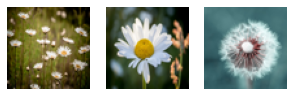

추정확률분포 [17,44,18, 7,13] => 추정 dandelion : 정답 daisy => X
추정확률분포 [14,16,18,23,28] => 추정 tulip : 정답 daisy => X
추정확률분포 [16,17,19,21,27] => 추정 tulip : 정답 dandelion => X


In [255]:
CnnExtModel.set_macro('plain_flower',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':16, 'actions':'#act'}],
        ['max', {'stride':2}],
        ['loop', {'repeat':4}, ['conv', {'ksize':3, 'chn':16, 'actions':'#act'}]],
        ['custom', {'name':'pn', 'args':{'#cnt1':3, '#n':32, '#act':'#act'}}],
        ['custom', {'name':'pn', 'args':{'#cnt1':3, '#n':64, '#act':'#act'}}],
        ['avg', {'stride':4}]])

plain_flower = CnnExtModel('plain_flower', fd,
        ['custom', {'name':'plain_flower', 'args':{'#act':'LBA'}}],
                    dump_structure=True)

plain_flower.exec_all(epoch_count=EPOCH, report=2, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )
# plain_flower.exec_all(epoch_count=1, report=2)

In [194]:
plain_flower.layers

[rsd_net(
   (rsd1): Sequential(
     (0): Conv2d(3, 16, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
     (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
     (2): ReLU()
     (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
   )
   (rsd2): Sequential(
     (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
     (2): ReLU()
     (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
     (5): ReLU()
     (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (7): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
     (8): ReLU()
     (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (10): BatchNorm2d(16, eps=1e-05, mom

In [303]:
CnnExtModel.set_macro('residual_flower',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':16, 'actions':'#act'}],
        ['max', {'stride':2}],
        ['custom', {'name':'rfull', 'args':{'#cnt':2, '#n':16, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':1, '#n':32, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':1, '#n':64, '#act':'#act'}}],
        ['avg', {'stride':4}]])

residual_flower = CnnExtModel('residual_flower', fd,
      ['custom', {'name':'residual_flower', 'args':{'#act':'LAB'}}],
                  dump_structure=True)
residual_flower.exec_all(epoch_count=EPOCH, report=2, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )

custom residual_flower
  serial
    1: conv, (3, 64, 64)=>[16, 32, 32]pm : 16x3x7x7+16 = 2368
    2: max, [16, 32, 32]=>[16, 16, 16]
    custom rfull
      serial
        loop
          custom rf
            add
              serial
                3: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
                4: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
          custom rf
            add
              serial
                5: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
                6: conv, [16, 16, 16]=>[16, 16, 16]pm : 16x16x3x3+16 = 2320
    custom rhalf
      serial
        custom rh
          add
            serial
              7: conv, [16, 16, 16]=>[32, 8, 8]pm : 32x16x3x3+32 = 4640
              8: conv, [32, 8, 8]=>[32, 8, 8]pm : 32x32x3x3+32 = 9248
            9: avg, [16, 16, 16]=>[16, 8, 8]
        loop
          custom rf
            add
              serial
                10: conv, [32, 8, 8]=>[32, 8, 8]pm : 32x32x3x3+32 = 

RuntimeError: Given groups=1, weight of size [16, 16, 3, 3], expected input[20, 96, 16, 16] to have 16 channels, but got 96 channels instead

In [ ]:
CnnExtModel.set_macro('bottleneck_flower',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':16, 'actions':'#act'}],
        ['max', {'ksize':3, 'stride':2}],
        ['custom', {'name':'bfull', 'args':{'#cnt':1,'#n1':16,'#n4': 64,
            '#act':'#act'}}],
        ['custom', {'name':'bhalf', 'args':{'#cnt1':2,'#n1':32,'#n4':128
            '#act':'#act'}}],
        ['custom', {'name':'bhalf', 'args':{'#cnt1':1,'#n1':64,'#n4':256,
            '#act':'#act'}}],
        ['avg', {'stride':4}]])

bottleneck_flower = CnnExtModel('bottleneck_flower', fd,
    ['custom', {'name':'bottleneck_flower', 'args':{'#act':'LAB'}}],
        dump_structure=True)
bottleneck_flower.exec_all(epoch_count=10, report=2)